In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


In [127]:
df=pd.read_excel('C:/Users/Sushant/Desktop/QLC/Data1.xlsx')

In [128]:
df.head()

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks fo..."
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revis..."
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings ..."
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings ..."
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up\r\n\r\nCalled on landline number\r\...


In [129]:
df['OpportunityId'].value_counts().head(10)

F6940342-E51C-48A4-AECB-777B77875524    450
EAA36028-A439-4688-920F-58FAA83B847C    424
346CF27F-73A9-4025-8CE8-1EB66A481A88    417
3A8B77A9-6103-4011-A52B-B49B34C33E96    410
E25C2A1D-B660-46EE-A53C-65600B43C95C    378
C2C038CB-EBAF-4C66-B736-B86AE990E955    357
791BCC02-0E2D-4AF1-AC52-4A3CE2D0D493    325
88A39F5B-9213-49A5-8F9A-97EE0DFE92D6    324
3A95E50A-BE67-4F04-98D1-DF0EE4D737E4    303
9E41B825-94BC-4BFB-BC95-2151A2EDFCD2    288
Name: OpportunityId, dtype: int64

# Data cleaning process

In [130]:
#null values
df.isnull().sum()

Unnamed: 0                0
OpportunityId             0
OpportunityStageName      0
ActivityDescription     128
dtype: int64

In [131]:
df=df.dropna()

In [132]:
#NUll values Removed
df.isnull().sum()

Unnamed: 0              0
OpportunityId           0
OpportunityStageName    0
ActivityDescription     0
dtype: int64

# Data preprocessing and EDA

In [133]:
df['ActivityDescription']=df['ActivityDescription'].apply(str)


In [134]:
def lowercase(text):
    return str(text).lower()
df['ActivityDescription']=df['ActivityDescription'].apply(lowercase)

In [135]:
def cleaningText(text):
    return re.sub('[^a-zA-Z]',' ',text)
df['ActivityDescription']=df['ActivityDescription'].apply(cleaningText)

In [136]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,proformainvoice dear sir thanks for orde...
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,emailed dear sir please find revised pro...
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,proposal dear ma am greetings w...
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,proposal dear ma am greetings w...
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,follow up called on landline number discu...
...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,please send pi so we can process the same
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,please send proposal to yogiraj
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,dear sir greetings from qlc thank...
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,payment will release on tomorrow


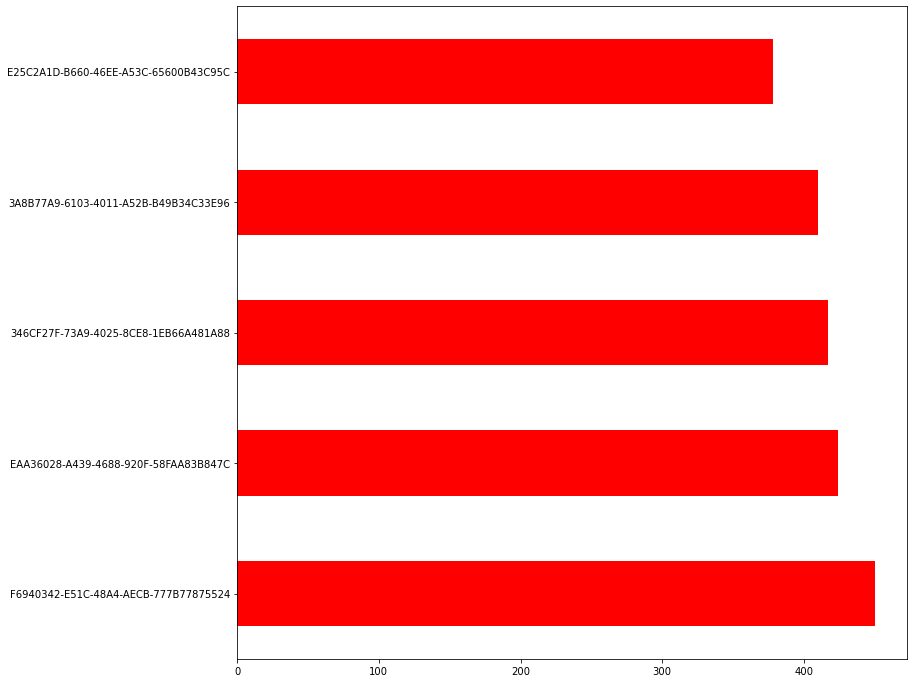

In [137]:
df['OpportunityId'].value_counts().head().plot(kind='barh',color='red')

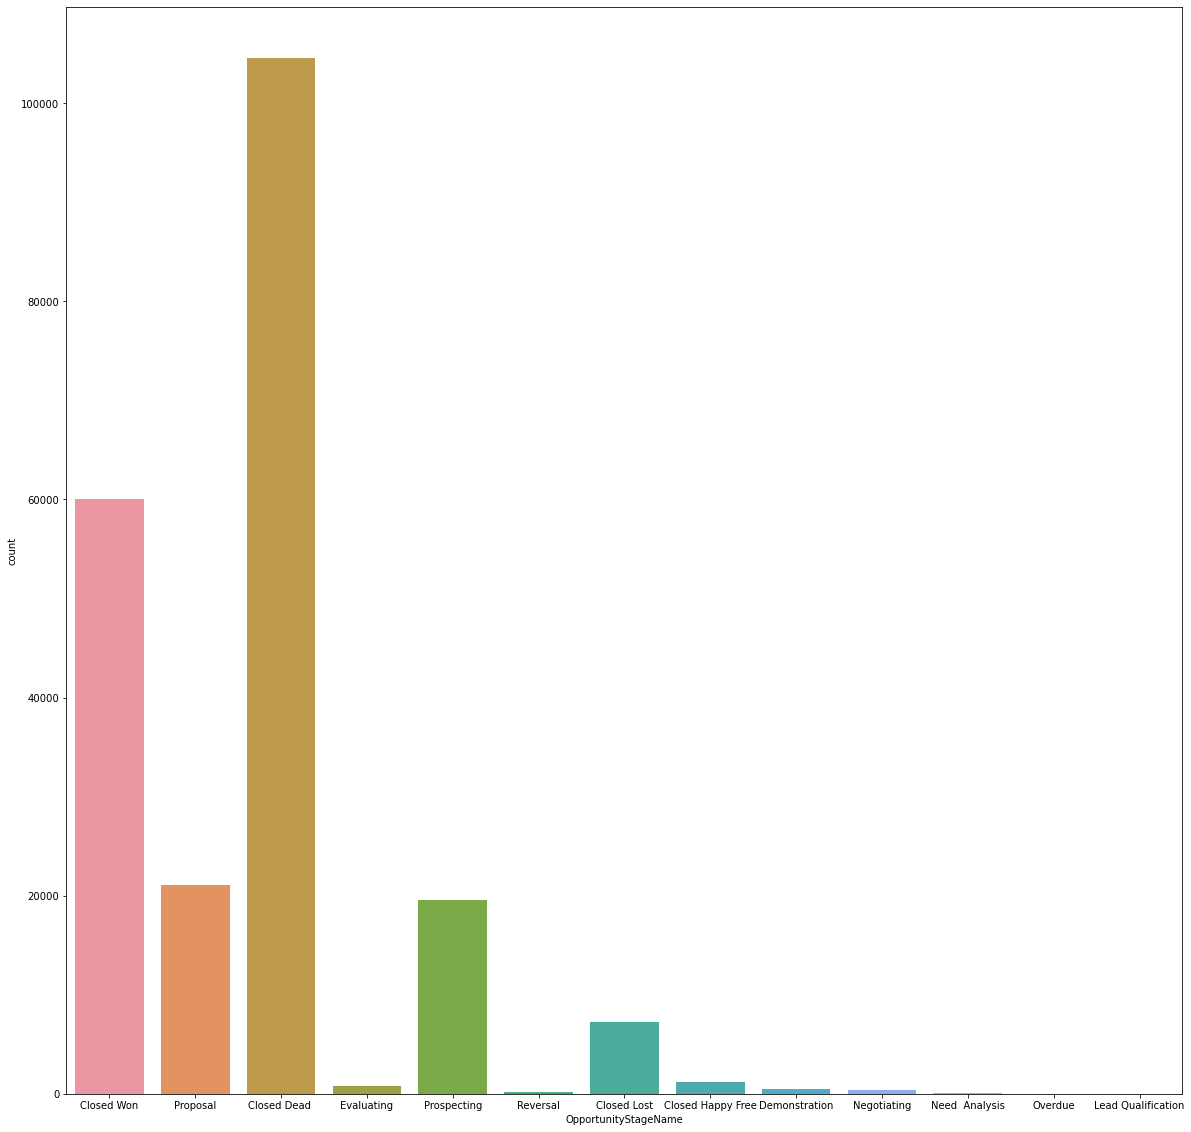

In [138]:
plt.figure(figsize=(20,20))
sns.countplot(x='OpportunityStageName',data=df)

# display plot
plt.show()

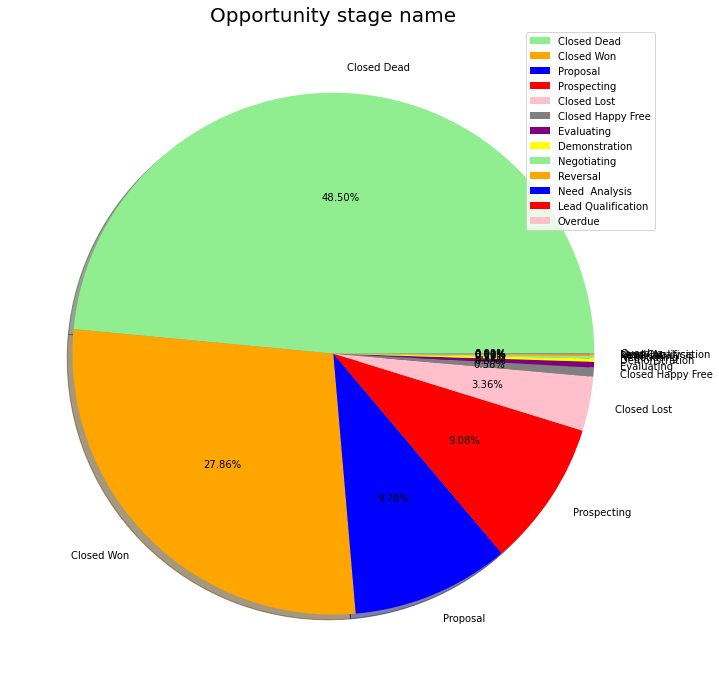

In [139]:
labels = ['Closed Dead','Closed Won','Proposal ','Prospecting','Closed Lost','Closed Happy Free','Evaluating','Demonstration','Negotiating','Reversal','Need  Analysis','Lead Qualification','Overdue']
size = df['OpportunityStageName'].value_counts()
colors = ['lightgreen', 'orange','blue','red','pink','grey','purple','yellow']
explode = [0, 0.1,1]

plt.rcParams['figure.figsize'] = (12, 12)
plt.pie(size, colors = colors, shadow = True,labels=labels, autopct = '%.2f%%')
plt.title('Opportunity stage name', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

(-0.5, 799.5, 499.5, -0.5)

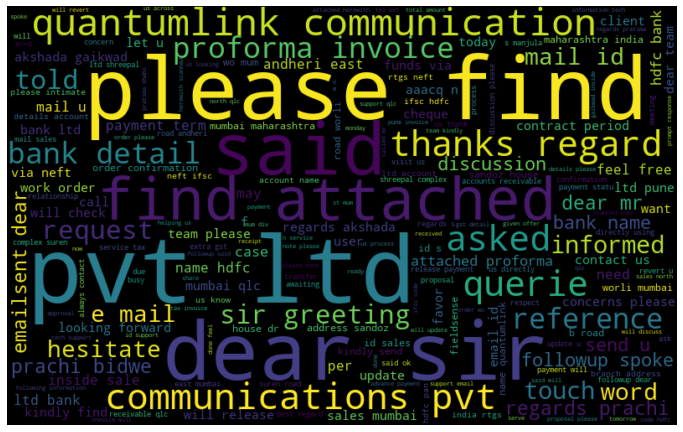

In [97]:
##Lets have a look at wordcloud of highest 2 stages i.e CLosedDead and CLosed_won 
Closed_won=' '.join([text for text in df['ActivityDescription'][df['OpportunityStageName'] == 'Closed Won']])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Closed_won)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

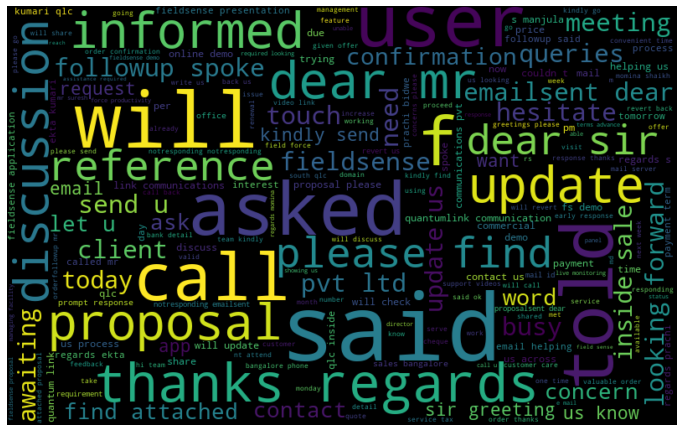

In [98]:
Closed_lost=' '.join([text for text in df['ActivityDescription'][df['OpportunityStageName'] == 'Closed Lost']])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Closed_lost)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Tokenization of Data

In [140]:
def cleanTokenization(text):
    return word_tokenize(text)
df['ActivityDescription']=df['ActivityDescription'].apply(cleanTokenization)

In [100]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[proformainvoice, dear, sir, thanks, for, orde..."
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[emailed, dear, sir, please, find, revised, pr..."
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[proposal, dear, ma, am, greetings, with, refe..."
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[proposal, dear, ma, am, greetings, with, refe..."
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[follow, up, called, on, landline, number, dis..."
...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[please, send, pi, so, we, can, process, the, ..."
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[please, send, proposal, to, yogiraj]"
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[dear, sir, greetings, from, qlc, thank, you, ..."
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[payment, will, release, on, tomorrow]"


# Removal of Stopwords

In [141]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [142]:
from nltk.corpus import stopwords

stop_words=set (stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]
df['ActivityDescription']=df['ActivityDescription'].apply(clean_stopwords)

# Steming and Lemmatization

In [143]:
stemmer=PorterStemmer()
def clean_stem(token):
    return[stemmer.stem(i) for i in token ]
df['ActivityDescription']=df['ActivityDescription'].apply(clean_stem)

In [144]:
lemma=WordNetLemmatizer()
def clean_lemmatization(token):
    return[lemma.lemmatize(word=w,pos='v')for w in token ]
df['ActivityDescription']=df['ActivityDescription'].apply(clean_lemmatization)

In [145]:
def clean_length(token):
    return[i for i in token if len(i) > 2 ]
df['ActivityDescription']=df['ActivityDescription'].apply(clean_length)

In [62]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[proformainvoic, dear, sir, thank, order, conf..."
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[email, dear, sir, pleas, find, revis, proform..."
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[propos, dear, greet, refer, discuss, amol, ku..."
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[propos, dear, greet, refer, discuss, amol, ku..."
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[follow, call, landlin, number, discuss, regar..."
...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[pleas, send, process]"
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[pleas, send, propos, yogiraj]"
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[dear, sir, greet, qlc, thank, much, valuabl, ..."
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[payment, releas, tomorrow]"


In [63]:
##converting back to string
def convert_to_string(text):
    return ' '.join(text)
df['ActivityDescription']=df['ActivityDescription'].apply(convert_to_string)

In [33]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,proformainvoic dear sir thank order confirm pl...
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,email dear sir pleas find revis proforma invoi...
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,propos dear greet refer discuss amol kumbhar p...
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,propos dear greet refer discuss amol kumbhar p...
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,follow call landlin number discuss regar propo...
...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,pleas send process
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,pleas send propos yogiraj
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,dear sir greet qlc thank much valuabl order pl...
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,payment releas tomorrow


(-0.5, 799.5, 499.5, -0.5)

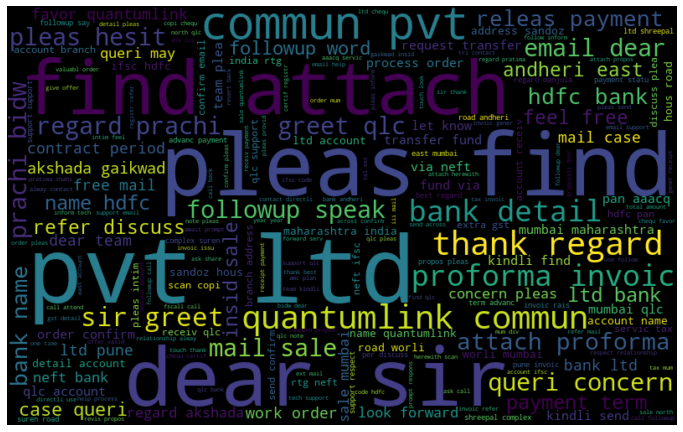

In [65]:
##Lets have a look at wordcloud of highest 2 stages i.e CLosedDead and CLosed_won 
Closed_won=' '.join([text for text in df['ActivityDescription'][df['OpportunityStageName'] == 'Closed Won']])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Closed_won)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

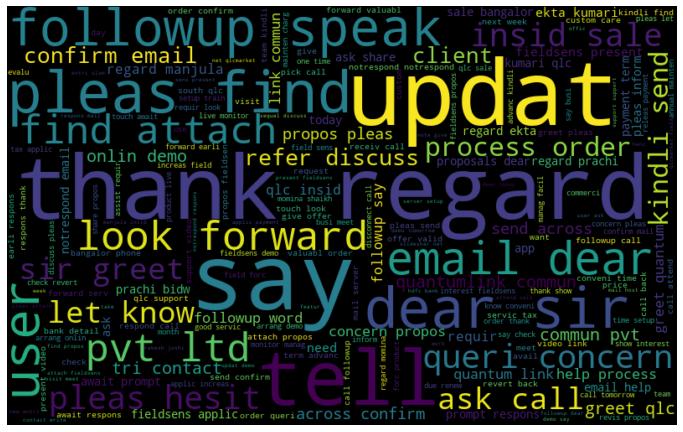

In [64]:
Closed_lost=' '.join([text for text in df['ActivityDescription'][df['OpportunityStageName'] == 'Closed Lost']])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Closed_lost)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [146]:
##Feature engineering
def label_func(OpportunityStageName):
    if (OpportunityStageName=='Closed Dead' or OpportunityStageName=='Closed Lost' or OpportunityStageName=='Overdue'):
        return 'Negative'
    elif (OpportunityStageName=='Closed Won' or OpportunityStageName=='Closed Happy Free' or OpportunityStageName=='Negotiating' or OpportunityStageName=='Reversal' or OpportunityStageName=='Demonstration' or OpportunityStageName=='Lead Qualification'):
        return 'Positive'
    else:
        return 'Neutral'
df['Label']=df['OpportunityStageName'].apply(label_func)

In [147]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,Label
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[proformainvoic, dear, sir, thank, order, conf...",Positive
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[email, dear, sir, pleas, find, revis, proform...",Positive
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[propos, dear, greet, refer, discuss, amol, ku...",Neutral
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[propos, dear, greet, refer, discuss, amol, ku...",Neutral
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[follow, call, landlin, number, discuss, regar...",Neutral
...,...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[pleas, send, process]",Positive
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[pleas, send, propos, yogiraj]",Positive
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[dear, sir, greet, qlc, thank, much, valuabl, ...",Positive
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[payment, releas, tomorrow]",Positive


In [148]:
df['Label'].value_counts()

Neutral     145974
Positive     62283
Negative      7251
Name: Label, dtype: int64

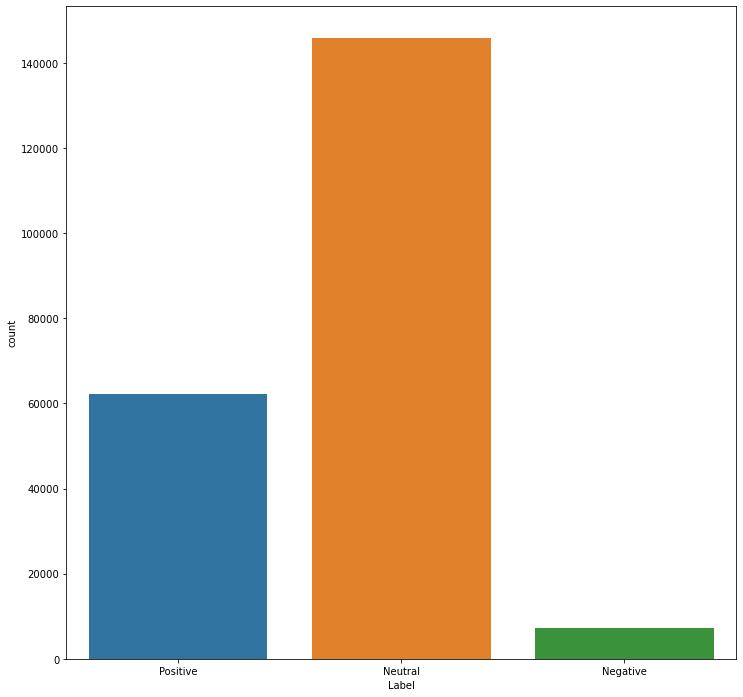

In [109]:
sns.countplot(x=df['Label'],data=df)

(-0.5, 799.5, 499.5, -0.5)

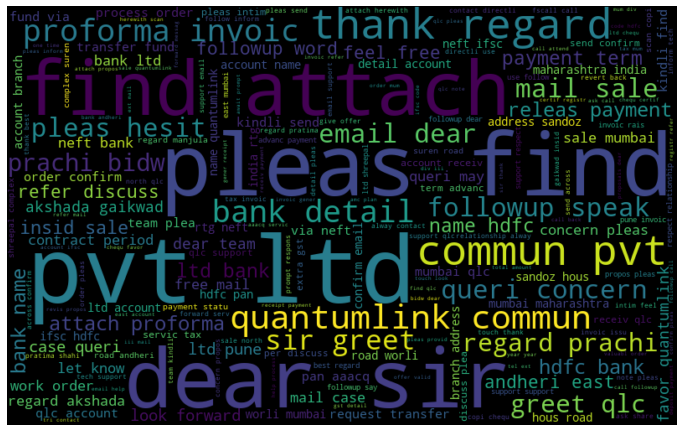

In [71]:
##WORDCLOUD for new Labelled category
#positive category
Label_positive=' '.join([text for text in df['ActivityDescription'][df['Label'] =='Positive']])

wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Label_positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

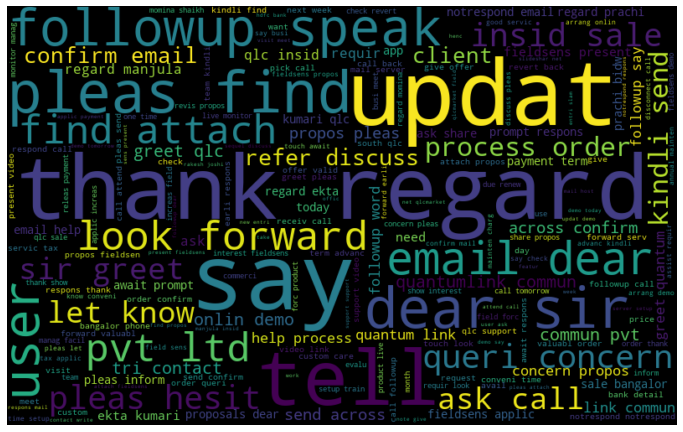

In [72]:
#Negative category
Label_Negative=' '.join([text for text in df['ActivityDescription'][df['Label'] =='Negative']])

wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Label_Negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

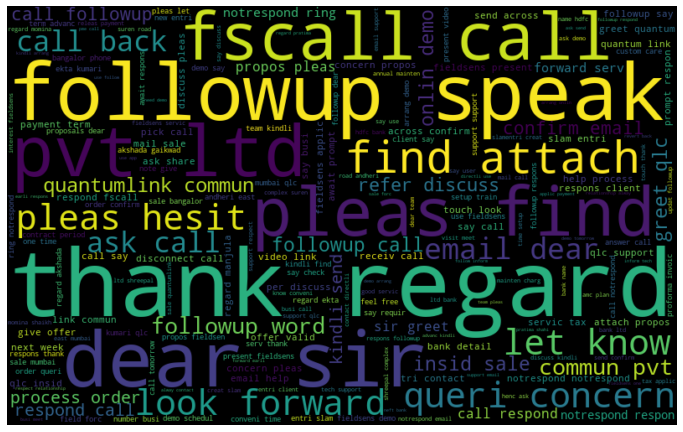

In [73]:
#Neutral category
Label_Neutral=' '.join([text for text in df['ActivityDescription'][df['Label'] =='Neutral']])

wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Label_Neutral)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [125]:
df

,Unnamed: 0,OpportunityId,OpportunityStageName,ActivityDescription,Label
0,0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[proformainvoic, dear, sir, thank, order, conf...",Positive
1,1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"[email, dear, sir, pleas, find, revis, proform...",Positive
2,2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[propos, dear, greet, refer, discuss, amol, ku...",Neutral
3,3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[propos, dear, greet, refer, discuss, amol, ku...",Neutral
4,4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"[follow, call, landlin, number, discuss, regar...",Neutral
...,...,...,...,...,...
215631,215631,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[pleas, send, process]",Positive
215632,215632,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[pleas, send, propos, yogiraj]",Positive
215633,215633,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[dear, sir, greet, qlc, thank, much, valuabl, ...",Positive
215634,215634,FFF9D8FB-8F8D-4FC8-811D-03E27587BA61,Closed Won,"[payment, releas, tomorrow]",Positive


In [153]:
##Model Buildiing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Instantiate count vectorizer
cv=CountVectorizer()

# Independent variable
X=df['ActivityDescription']
# dependent variable
y=df['Label']

# Counts
count=df['Label'].value_counts()

# Split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [154]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Instantiate calssifier
rf=RandomForestClassifier(random_state=2)

# fit model on training data
rf.fit(X_train,y_train)

# predict on test data
y_pred=rf.predict(X_test)

# calculate the accuracy score
score=accuracy_score(y_pred,y_test)

# calculate the precision
precision=precision_score(y_test,y_pred)

# display 'score' and 'precision'
print('Accuracy:',score)
print('Precision:',precision)

ValueError: setting an array element with a sequence.